In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set_theme(style="white")

# Red wines

In [ ]:
# Import the dataset and brief summary
red_df = pd.read_csv("data/wineQualityReds.csv", index_col=0, thousands=",")
display(red_df.describe())
display(red_df.mode(axis=0))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


There are 0.6253908692933083% of lower outliers and 1.125703564727955% of higher outliers


<Axes: xlabel='quality', ylabel='Count'>

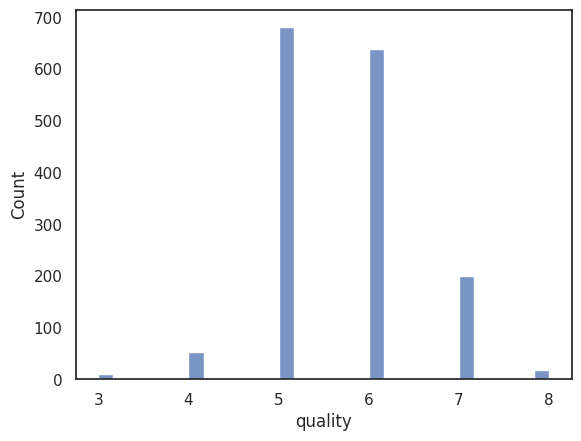

In [ ]:
# We see how many outliers are in the dataset
q1 = red_df["quality"].quantile(0.25)
q3 = red_df["quality"].quantile(0.75)

interquartile_distance = q3 - q1
lower_outlier = red_df.loc[red_df["quality"] < q1 - 1.5 * interquartile_distance]
higher_outlier = red_df.loc[red_df["quality"] > q3 + 1.5 * interquartile_distance]
print(
    f"There are {100*len(lower_outlier)/len(red_df)}% of lower outliers and {100*len(higher_outlier)/len(red_df)}% of higher outliers"
)

# What is the distribution of quality?
sns.histplot(red_df["quality"])

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

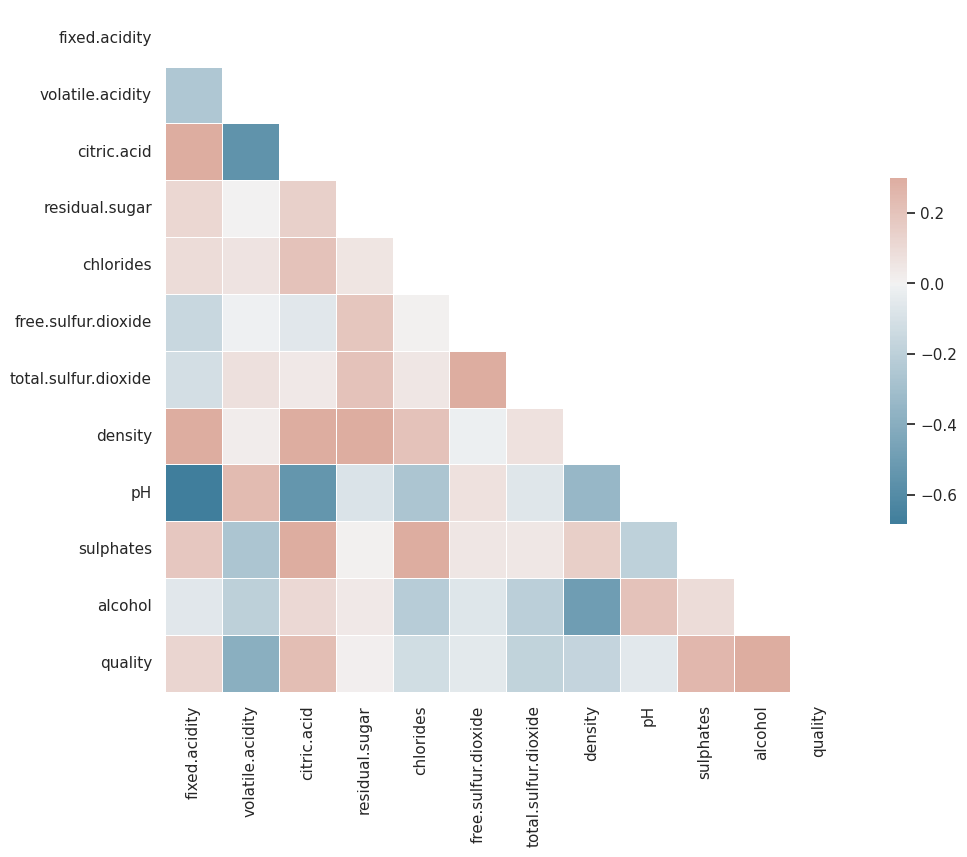

In [ ]:
# Let us now look at correlations

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(red_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    red_df.corr(),
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# We can also see it as a table
display(red_df.corr().loc["quality"])

From the previous table, the four other variables which seem most correlated with quality are
- alcohol
- volatile acidity
- sulphates
- citric acid

In [ ]:
def plot_corr_columns(column):
    fig, axes = plt.subplots(3, figsize=(10, 15))
    # Histogram plot
    display(red_df[column].describe())
    sns.histplot(red_df[column], ax=axes[0])
    # Alcohol average per quality level
    display(red_df.groupby("quality")[column].mean())

    sns.boxplot(x="quality", y=column, data=red_df, native_scale=True, ax=axes[1])
    axes[1].axhline(red_df[column].mean(), color="r")
    axes[1].axvline(red_df["quality"].mean(), color="g")

    sns.stripplot(
        x="quality", y=column, data=red_df, native_scale=True, zorder=1, ax=axes[2]
    )
    sns.regplot(
        x="quality",
        y=column,
        data=red_df,
        scatter=False,
        truncate=False,
        order=1,
        ax=axes[2],
    )
    axes[2].axhline(red_df[column].mean(), color="r")
    axes[2].axvline(red_df["quality"].mean(), color="g")

## Alcohol

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

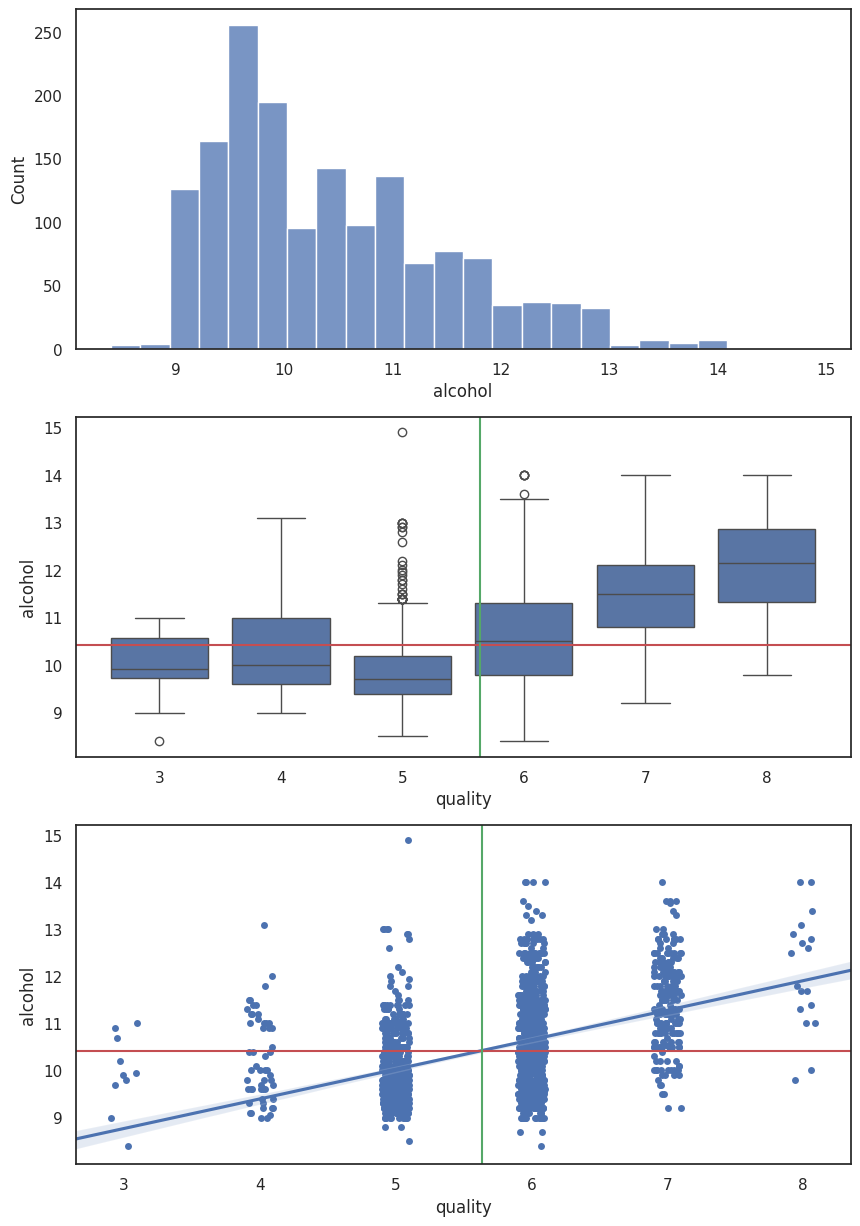

In [ ]:
plot_corr_columns("alcohol")

From the previous plots, we see that higher quality wines also have higher than average alcohol content. Can we confirm this trend?

## Citric acid

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric.acid, dtype: float64

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric.acid, dtype: float64

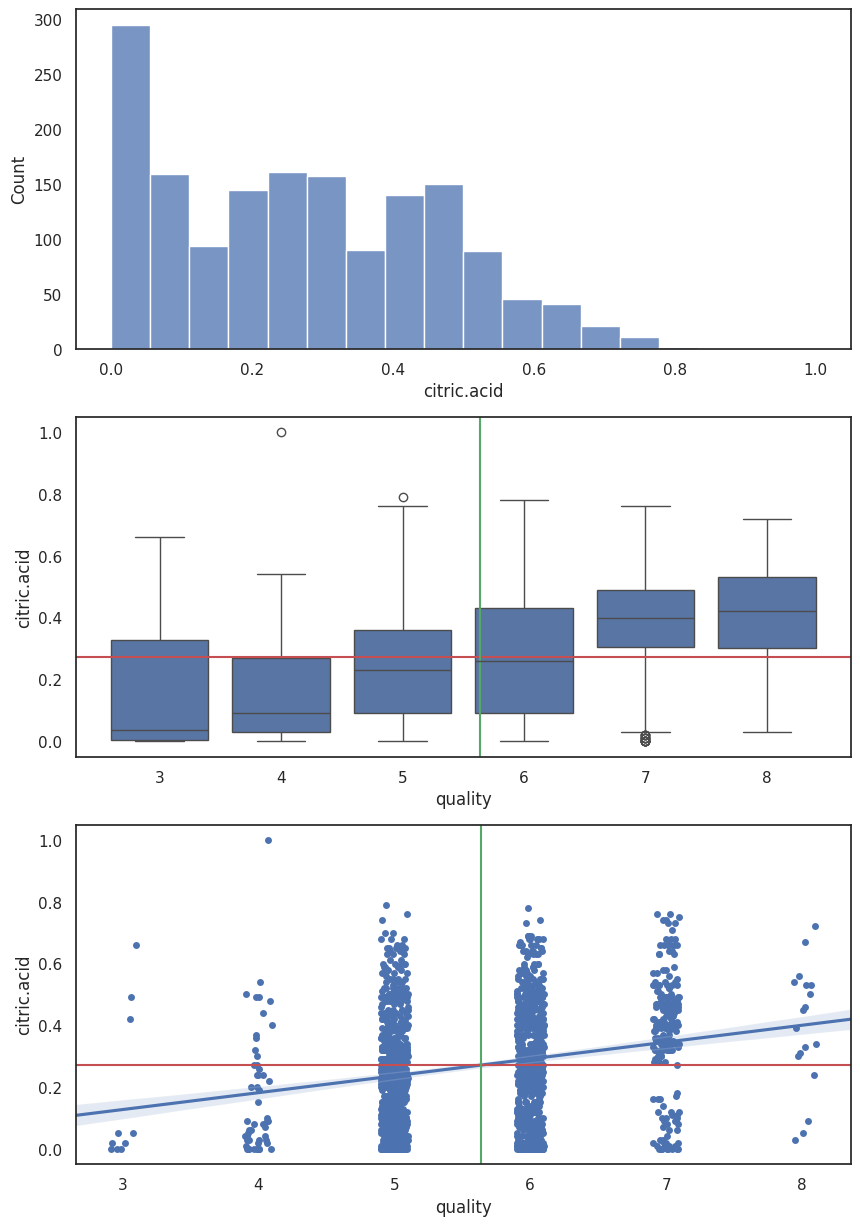

In [ ]:
plot_corr_columns("citric.acid")

We see from the previous plots that higher quality wines have higher content of citric acid, although a lot of our wines have low citric acidity

## Volatile acidity

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile.acidity, dtype: float64

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile.acidity, dtype: float64

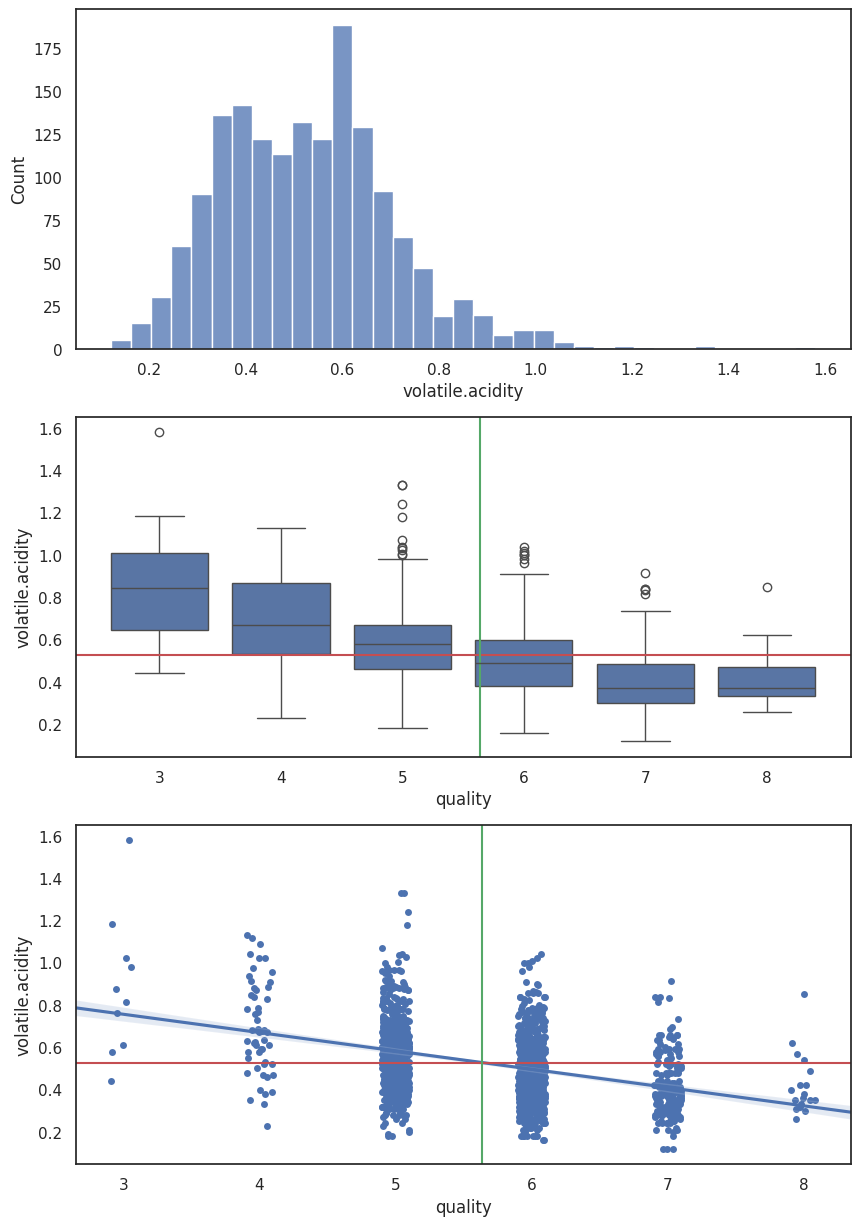

In [ ]:
plot_corr_columns("volatile.acidity")

Here we find the quality clearly decreases with volatile acidity. Can we push this analysis a bit further?

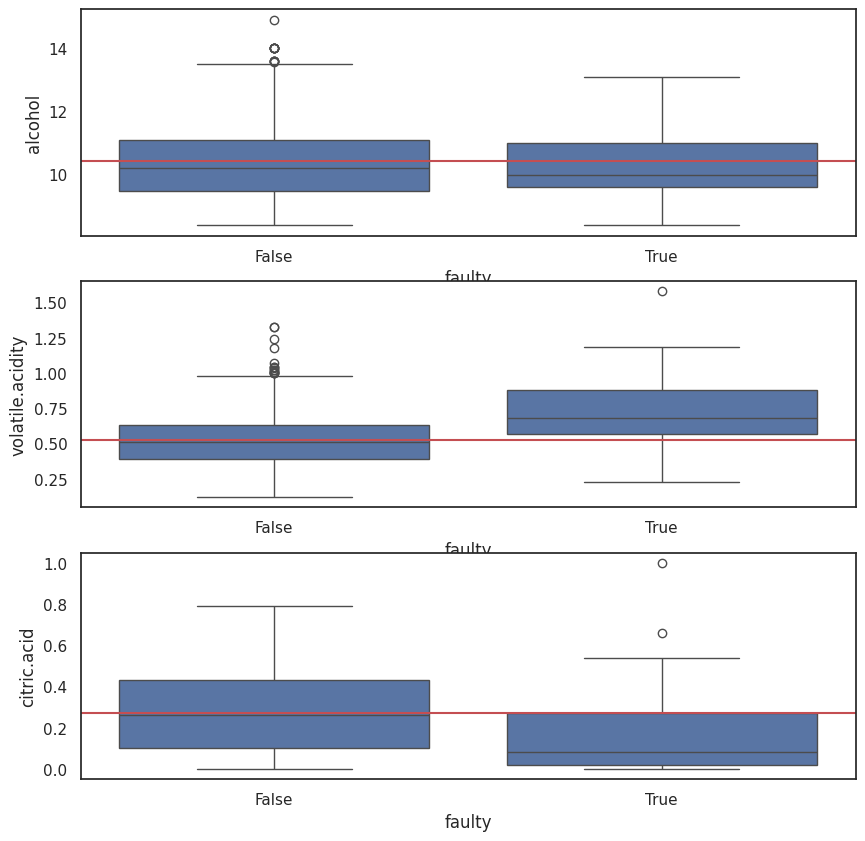

In [ ]:
red_df["faulty"] = white_df["quality"] < 5  # Faulty wines
white_df.loc[white_df["faulty"]]["faulty"].count() / whitete_df["faulty"].count()

fig, axs = plt.subplots(3, figsize=(10, 10))
sns.boxplot(white_df, x="faulty", y="alcohol", ax=axs[0])
axs[0].axhline(white_df["alcohol"].mean(), color="r")
sns.boxplot(white_df, x="faulty", y="volatile.acidity", ax=axs[1])
axs[1].axhline(red_df["volatile.acidity"].mean(), color="r")
sns.boxplot(red_df, x="faulty", y="citric.acid", ax=axs[2])
axs[2].axhline(red_df["citric.acid"].mean(), color="r")

## Summary

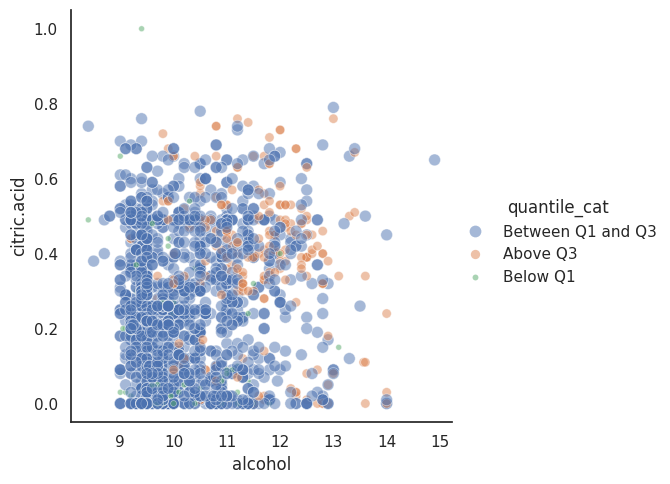

In [ ]:
red_df["quantile_cat"] = "Between Q1 and Q3"
red_df.loc[red_df["quality"] < red_df["quality"].quantile(0.25), "quantile_cat"] = (
    "Below Q1"
)
red_df.loc[red_df["quality"] > red_df["quality"].quantile(0.75), "quantile_cat"] = (
    "Above Q3"
)
sns.relplot(
    red_df,
    x="alcohol",
    y="citric.acid",
    hue="quantile_cat",
    size="quantile_cat",
    alpha=0.5,
)

In [ ]:
# Now let's define quadrants
red_df.loc[
    (red_df["citric.acid"] > red_df["citric.acid"].mean())
    & (red_df["alcohol"] > red_df["alcohol"].mean()),
    "quadrant",
] = "Upper-right"
red_df.loc[
    (red_df["citric.acid"] > red_df["citric.acid"].mean())
    & (red_df["alcohol"] <= red_df["alcohol"].mean()),
    "quadrant",
] = "Upper-left"
red_df.loc[
    (red_df["citric.acid"] <= red_df["citric.acid"].mean())
    & (red_df["alcohol"] > red_df["alcohol"].mean()),
    "quadrant",
] = "Lower-right"
red_df.loc[
    (red_df["citric.acid"] <= red_df["citric.acid"].mean())
    & (red_df["alcohol"] <= red_df["alcohol"].mean()),
    "quadrant",
] = "Lower-left"

In [ ]:
red_groupby_quadrant_df = red_df.groupby("quadrant")
quadrant_count = red_groupby_quadrant_df["faulty"].count()
display(quadrant_count)
red_groupby_quadrant_faulty_df = red_df.loc[red_df["faulty"]].groupby("quadrant")
quadrant_faulty_count = red_groupby_quadrant_faulty_df["faulty"].count()
display(quadrant_faulty_count)

display(quadrant_faulty_count / quadrant_count)

quadrant
Lower-left     561
Lower-right    291
Upper-left     355
Upper-right    392
Name: faulty, dtype: int64

quadrant
Lower-left     27
Lower-right    21
Upper-left     13
Upper-right     2
Name: faulty, dtype: int64

quadrant
Lower-left     0.048128
Lower-right    0.072165
Upper-left     0.036620
Upper-right    0.005102
Name: faulty, dtype: float64

So there is an order of magnitude less of faulty wines in the high alcohol and high citric acid content

In [ ]:
red_df["high_volatile_acidity"] = (
    red_df["volatile.acidity"] > red_df["volatile.acidity"].mean()
)

red_groupby_quadrant_df = red_df.groupby("quadrant")
quadrant_count = red_groupby_quadrant_df["faulty"].count()
display(quadrant_count)
red_groupby_quadrant_high_volatile_acidity_df = red_df.loc[
    red_df["high_volatile_acidity"]
].groupby("quadrant")
quadrant_high_volatile_acidity_count = red_groupby_quadrant_high_volatile_acidity_df[
    "high_volatile_acidity"
].count()
display(quadrant_high_volatile_acidity_count)

display(quadrant_high_volatile_acidity_count / quadrant_count)

quadrant
Lower-left     561
Lower-right    291
Upper-left     355
Upper-right    392
Name: faulty, dtype: int64

quadrant
Lower-left     438
Lower-right    201
Upper-left     103
Upper-right     41
Name: high_volatile_acidity, dtype: int64

quadrant
Lower-left     0.780749
Lower-right    0.690722
Upper-left     0.290141
Upper-right    0.104592
dtype: float64

We see the lower quadrants have much more volatile acidity than upper quadrants, and it's because of the anti-correlation between citric acidity and volatile acidity

In [ ]:
red_df[["volatile.acidity", "citric.acid"]].corr()

,volatile.acidity,citric.acid
volatile.acidity,1.000000,-0.552496
citric.acid,-0.552496,1.000000


In [ ]:
# Import the dataset and brief summary
red_df = pd.read_csv("data/wineQualityReds.csv", index_col=0, thousands=",")
display(red_df.describe())
display(red_df.mode(axis=0))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


In [109]:
# Import the dataset and brief summary
red_df = pd.read_csv("data/wineQualityReds.csv", index_col=0, thousands=",")
display(red_df.describe())
display(red_df.mode(axis=0))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


There are 0.6253908692933083% of lower outliers and 1.125703564727955% of higher outliers


<Axes: xlabel='quality', ylabel='Count'>

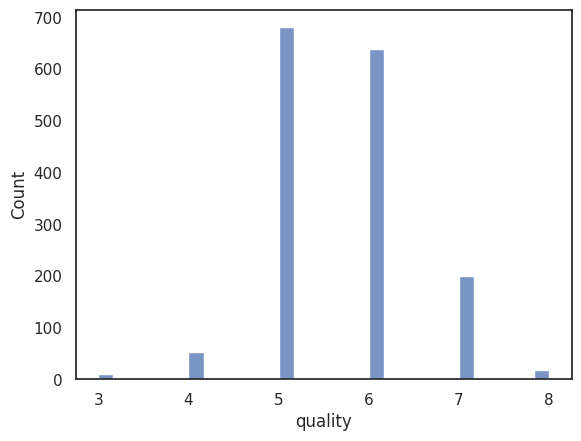

In [3]:
# We see how many outliers are in the dataset
q1 = red_df["quality"].quantile(0.25)
q3 = red_df["quality"].quantile(0.75)

interquartile_distance = q3 - q1
lower_outlier = red_df.loc[red_df["quality"] < q1 - 1.5 * interquartile_distance]
higher_outlier = red_df.loc[red_df["quality"] > q3 + 1.5 * interquartile_distance]
print(
    f"There are {100*len(lower_outlier)/len(red_df)}% of lower outliers and {100*len(higher_outlier)/len(red_df)}% of higher outliers"
)

# What is the distribution of quality?
sns.histplot(red_df["quality"])

fixed.acidity           0.124052
volatile.acidity       -0.390558
citric.acid             0.226373
residual.sugar          0.013732
chlorides              -0.128907
free.sulfur.dioxide    -0.050656
total.sulfur.dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

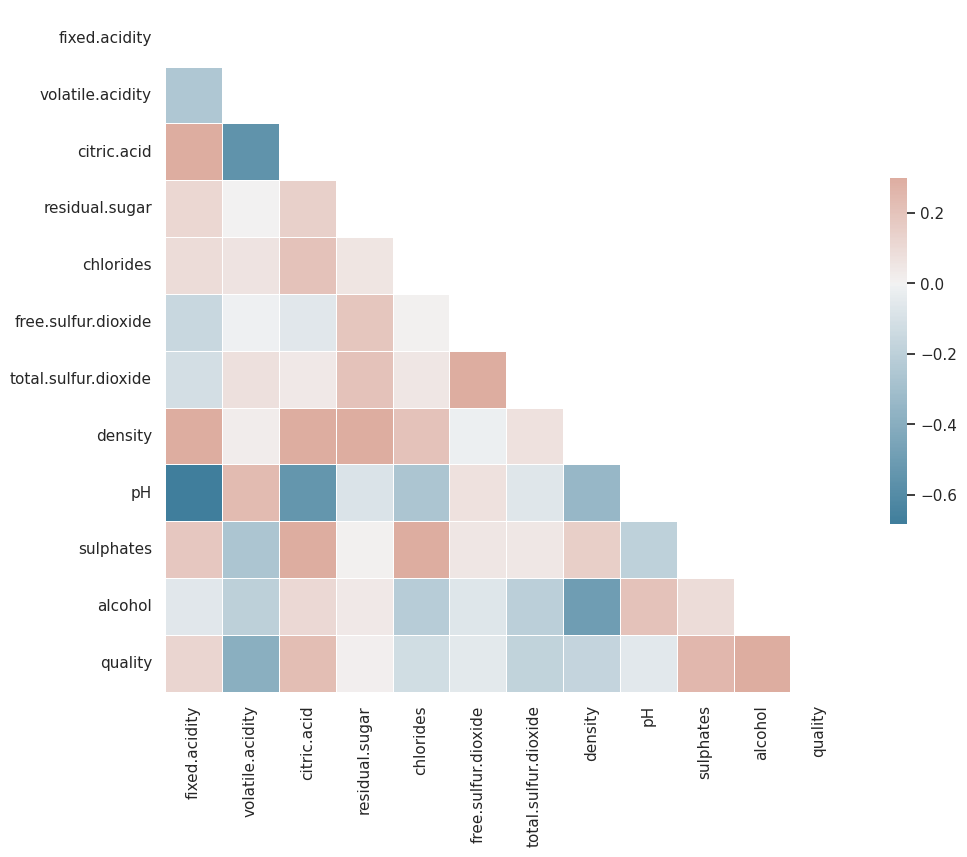

In [4]:
# Let us now look at correlations

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(red_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    red_df.corr(),
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# We can also see it as a table
display(red_df.corr().loc["quality"])

From the previous table, the four other variables which seem most correlated with quality are
- alcohol
- volatile acidity
- sulphates
- citric acid

In [55]:
def plot_corr_columns(column):
    fig, axes = plt.subplots(3, figsize=(10, 15))
    # Histogram plot
    display(red_df[column].describe())
    sns.histplot(red_df[column], ax=axes[0])
    # Alcohol average per quality level
    display(red_df.groupby("quality")[column].mean())

    sns.boxplot(x="quality", y=column, data=red_df, native_scale=True, ax=axes[1])
    axes[1].axhline(red_df[column].mean(), color="r")
    axes[1].axvline(red_df["quality"].mean(), color="g")

    sns.stripplot(
        x="quality", y=column, data=red_df, native_scale=True, zorder=1, ax=axes[2]
    )
    sns.regplot(
        x="quality",
        y=column,
        data=red_df,
        scatter=False,
        truncate=False,
        order=1,
        ax=axes[2],
    )
    axes[2].axhline(red_df[column].mean(), color="r")
    axes[2].axvline(red_df["quality"].mean(), color="g")

## Alcohol

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

quality
3     9.955000
4    10.265094
5     9.899706
6    10.629519
7    11.465913
8    12.094444
Name: alcohol, dtype: float64

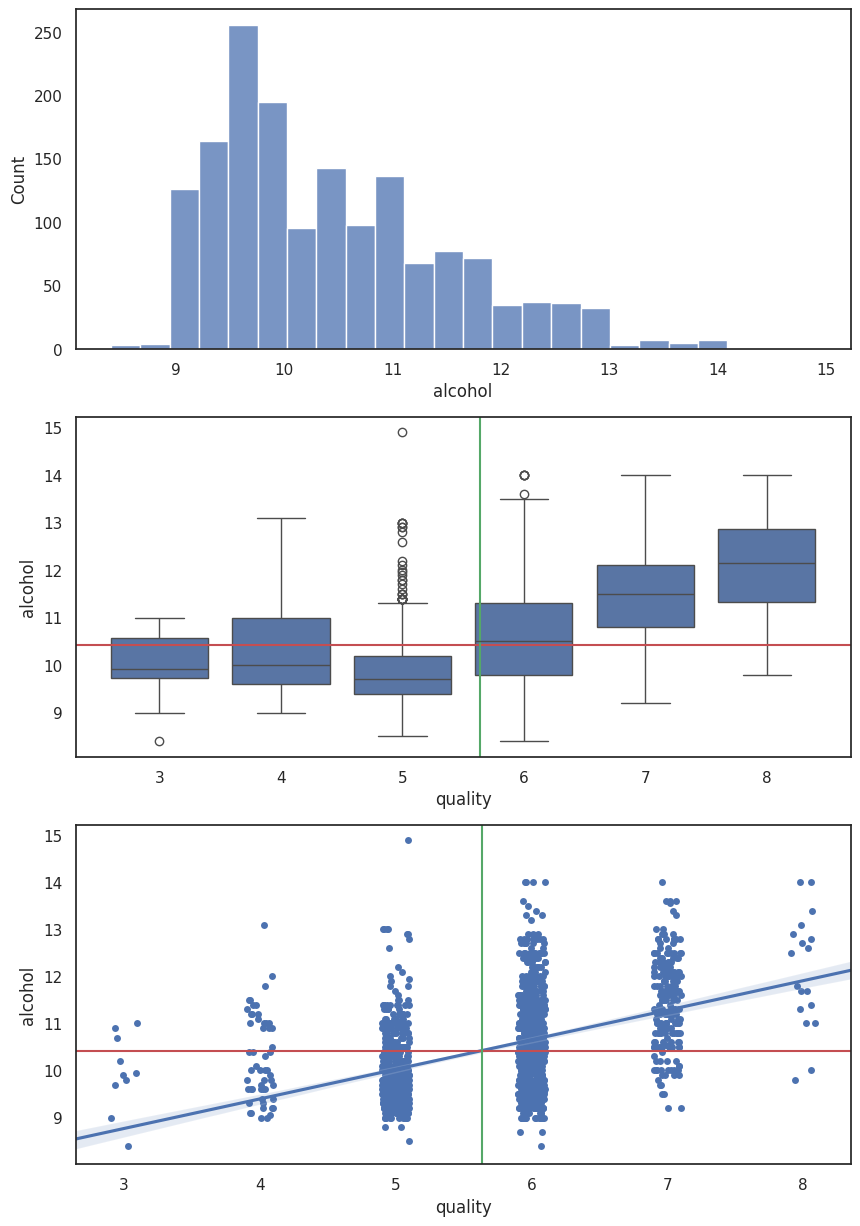

In [56]:
plot_corr_columns("alcohol")

From the previous plots, we see that higher quality wines also have higher than average alcohol content. Can we confirm this trend?

## Citric acid

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric.acid, dtype: float64

quality
3    0.171000
4    0.174151
5    0.243686
6    0.273824
7    0.375176
8    0.391111
Name: citric.acid, dtype: float64

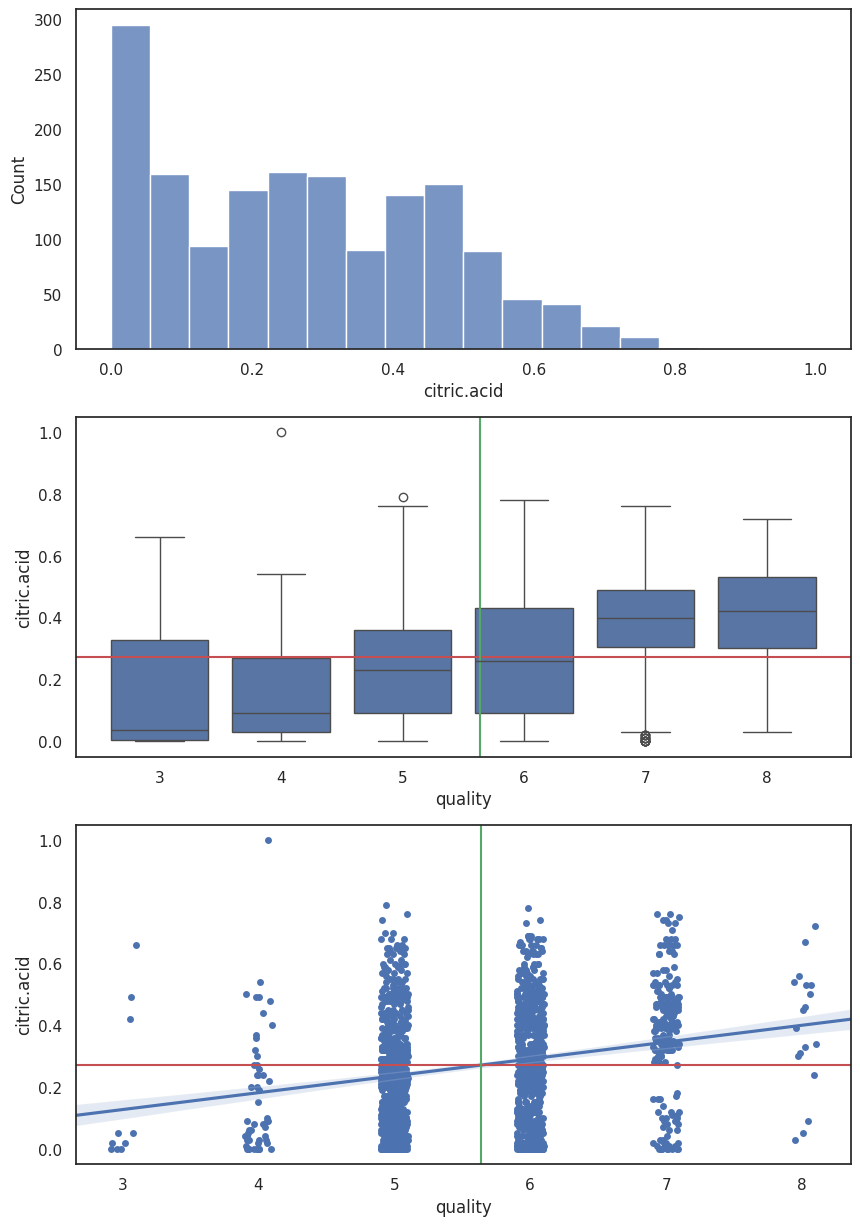

In [57]:
plot_corr_columns("citric.acid")

We see from the previous plots that higher quality wines have higher content of citric acid, although a lot of our wines have low citric acidity

## Volatile acidity

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile.acidity, dtype: float64

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile.acidity, dtype: float64

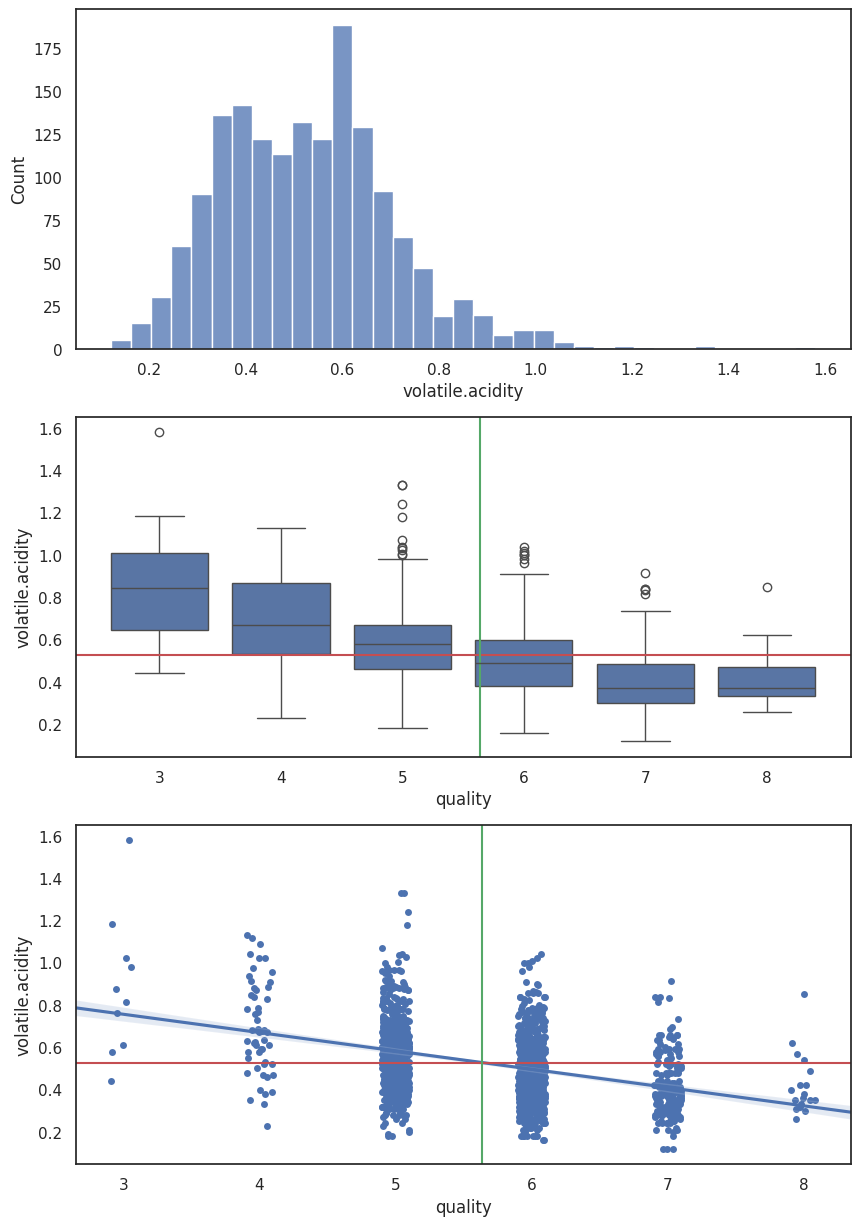

In [59]:
plot_corr_columns("volatile.acidity")

Here we find the quality clearly decreases with volatile acidity. Can we push this analysis a bit further?

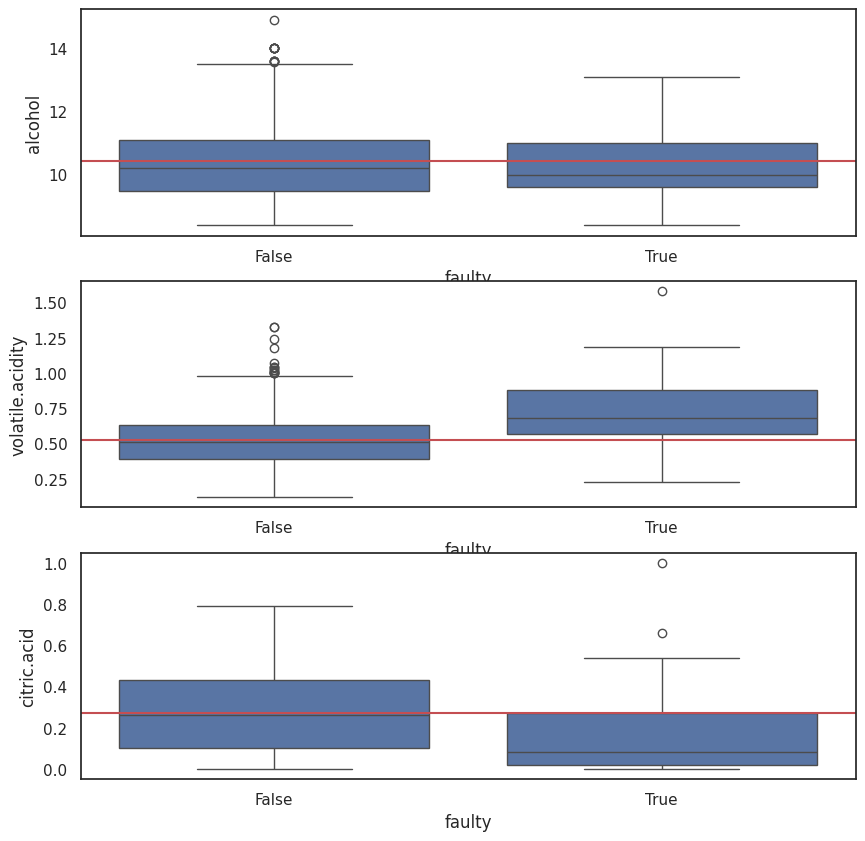

In [75]:
red_df["faulty"] = red_df["quality"] < 5  # Faulty wines
red_df.loc[red_df["faulty"]]["faulty"].count() / red_df["faulty"].count()

fig, axs = plt.subplots(3, figsize=(10, 10))
sns.boxplot(red_df, x="faulty", y="alcohol", ax=axs[0])
axs[0].axhline(red_df["alcohol"].mean(), color="r")
sns.boxplot(red_df, x="faulty", y="volatile.acidity", ax=axs[1])
axs[1].axhline(red_df["volatile.acidity"].mean(), color="r")
sns.boxplot(red_df, x="faulty", y="citric.acid", ax=axs[2])
axs[2].axhline(red_df["citric.acid"].mean(), color="r")

## Summary

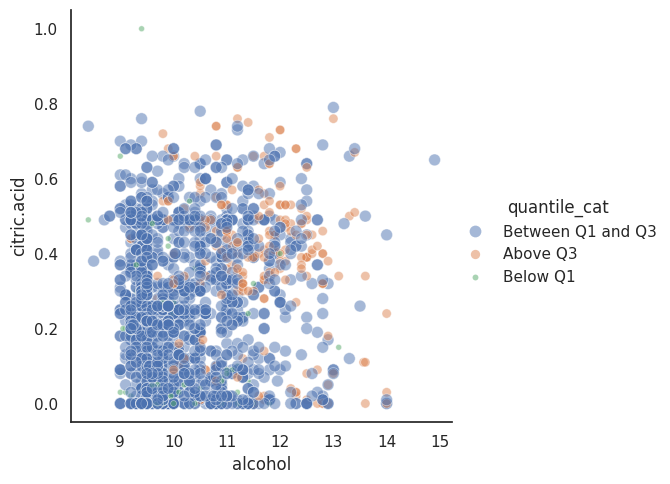

In [79]:
red_df["quantile_cat"] = "Between Q1 and Q3"
red_df.loc[red_df["quality"] < red_df["quality"].quantile(0.25), "quantile_cat"] = (
    "Below Q1"
)
red_df.loc[red_df["quality"] > red_df["quality"].quantile(0.75), "quantile_cat"] = (
    "Above Q3"
)
sns.relplot(
    red_df,
    x="alcohol",
    y="citric.acid",
    hue="quantile_cat",
    size="quantile_cat",
    alpha=0.5,
)

In [88]:
# Now let's define quadrants
red_df.loc[
    (red_df["citric.acid"] > red_df["citric.acid"].mean())
    & (red_df["alcohol"] > red_df["alcohol"].mean()),
    "quadrant",
] = "Upper-right"
red_df.loc[
    (red_df["citric.acid"] > red_df["citric.acid"].mean())
    & (red_df["alcohol"] <= red_df["alcohol"].mean()),
    "quadrant",
] = "Upper-left"
red_df.loc[
    (red_df["citric.acid"] <= red_df["citric.acid"].mean())
    & (red_df["alcohol"] > red_df["alcohol"].mean()),
    "quadrant",
] = "Lower-right"
red_df.loc[
    (red_df["citric.acid"] <= red_df["citric.acid"].mean())
    & (red_df["alcohol"] <= red_df["alcohol"].mean()),
    "quadrant",
] = "Lower-left"

In [102]:
red_groupby_quadrant_df = red_df.groupby("quadrant")
quadrant_count = red_groupby_quadrant_df["faulty"].count()
display(quadrant_count)
red_groupby_quadrant_faulty_df = red_df.loc[red_df["faulty"]].groupby("quadrant")
quadrant_faulty_count = red_groupby_quadrant_faulty_df["faulty"].count()
display(quadrant_faulty_count)

display(quadrant_faulty_count / quadrant_count)

quadrant
Lower-left     561
Lower-right    291
Upper-left     355
Upper-right    392
Name: faulty, dtype: int64

quadrant
Lower-left     27
Lower-right    21
Upper-left     13
Upper-right     2
Name: faulty, dtype: int64

quadrant
Lower-left     0.048128
Lower-right    0.072165
Upper-left     0.036620
Upper-right    0.005102
Name: faulty, dtype: float64

So there is an order of magnitude less of faulty wines in the high alcohol and high citric acid content

In [103]:
red_df["high_volatile_acidity"] = (
    red_df["volatile.acidity"] > red_df["volatile.acidity"].mean()
)

red_groupby_quadrant_df = red_df.groupby("quadrant")
quadrant_count = red_groupby_quadrant_df["faulty"].count()
display(quadrant_count)
red_groupby_quadrant_high_volatile_acidity_df = red_df.loc[
    red_df["high_volatile_acidity"]
].groupby("quadrant")
quadrant_high_volatile_acidity_count = red_groupby_quadrant_high_volatile_acidity_df[
    "high_volatile_acidity"
].count()
display(quadrant_high_volatile_acidity_count)

display(quadrant_high_volatile_acidity_count / quadrant_count)

quadrant
Lower-left     561
Lower-right    291
Upper-left     355
Upper-right    392
Name: faulty, dtype: int64

quadrant
Lower-left     438
Lower-right    201
Upper-left     103
Upper-right     41
Name: high_volatile_acidity, dtype: int64

quadrant
Lower-left     0.780749
Lower-right    0.690722
Upper-left     0.290141
Upper-right    0.104592
dtype: float64

We see the lower quadrants have much more volatile acidity than upper quadrants, and it's because of the anti-correlation between citric acidity and volatile acidity

In [107]:
red_df[["volatile.acidity", "citric.acid"]].corr()

,volatile.acidity,citric.acid
volatile.acidity,1.000000,-0.552496
citric.acid,-0.552496,1.000000


# White wines

In [112]:
# Import the dataset and brief summary
white_df = pd.read_csv("data/wineQualityWhites.csv", index_col=0, thousands=",")
display(white_df.describe())
display(white_df.mode(axis=0))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6


There are 0.2041649652919559% of lower outliers and 1.4291547570436913% of higher outliers


<Axes: xlabel='quality', ylabel='Count'>

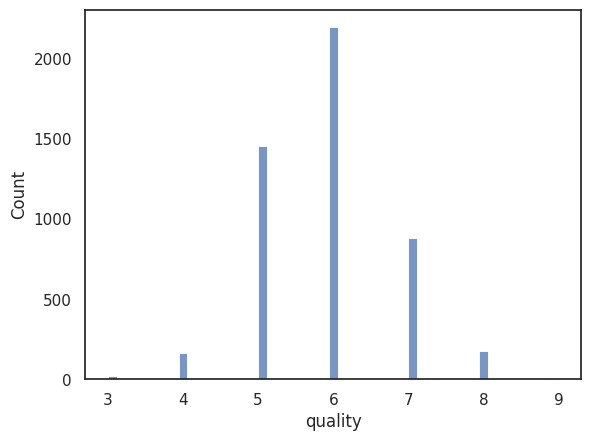

In [113]:
# We see how many outliers are in the dataset
q1 = white_df["quality"].quantile(0.25)
q3 = white_df["quality"].quantile(0.75)

interquartile_distance = q3 - q1
lower_outlier = red_df.loc[white_df["quality"] < q1 - 1.5 * interquartile_distance]
higher_outlier = red_df.loc[white_df["quality"] > q3 + 1.5 * interquartile_distance]
print(
    f"There are {100*len(lower_outlier)/len(white_df)}% of lower outliers and {100*len(higher_outlier)/len(white_df)}% of higher outliers"
)

# What is the distribution of quality?
sns.histplot(white_df["quality"])

fixed.acidity          -0.113663
volatile.acidity       -0.194723
citric.acid            -0.009209
residual.sugar         -0.097577
chlorides              -0.209934
free.sulfur.dioxide     0.008158
total.sulfur.dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

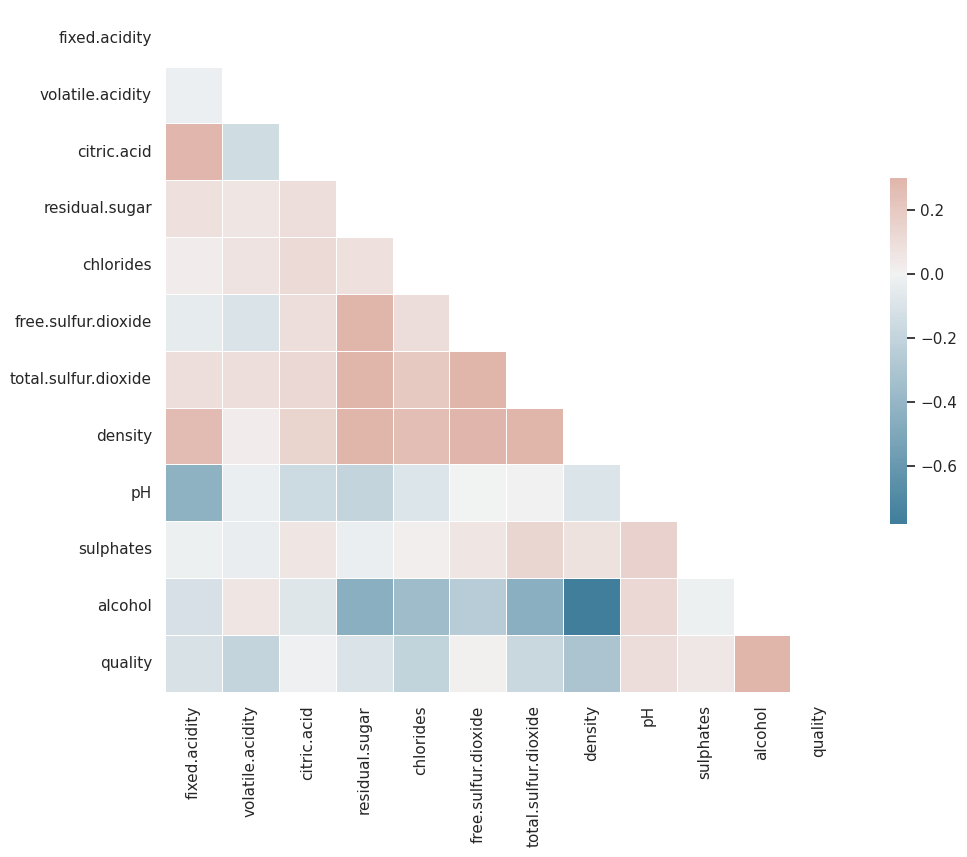

In [114]:
# Let us now look at correlations

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(white_df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    white_df.corr(),
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

# We can also see it as a table
display(white_df.corr().loc["quality"])

From the previous table, the four other variables which seem most correlated with quality are
- alcohol
- volatile acidity
- density
- chlorides

In [115]:
def plot_corr_columns_whites(column):
    fig, axes = plt.subplots(3, figsize=(10, 15))
    # Histogram plot
    display(white_df[column].describe())
    sns.histplot(red_df[column], ax=axes[0])
    # Alcohol average per quality level
    display(white_df.groupby("quality")[column].mean())

    sns.boxplot(x="quality", y=column, data=white_df, native_scale=True, ax=axes[1])
    axes[1].axhline(white_df[column].mean(), color="r")
    axes[1].axvline(white_df["quality"].mean(), color="g")

    sns.stripplot(
        x="quality", y=column, data=red_df, native_scale=True, zorder=1, ax=axes[2]
    )
    sns.regplot(
        x="quality",
        y=column,
        data=white_df,
        scatter=False,
        truncate=False,
        order=1,
        ax=axes[2],
    )
    axes[2].axhline(white_df[column].mean(), color="r")
    axes[2].axvline(white_df["quality"].mean(), color="g")

## Alcohol

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64

quality
3    10.345000
4    10.152454
5     9.808840
6    10.575372
7    11.367936
8    11.636000
9    12.180000
Name: alcohol, dtype: float64

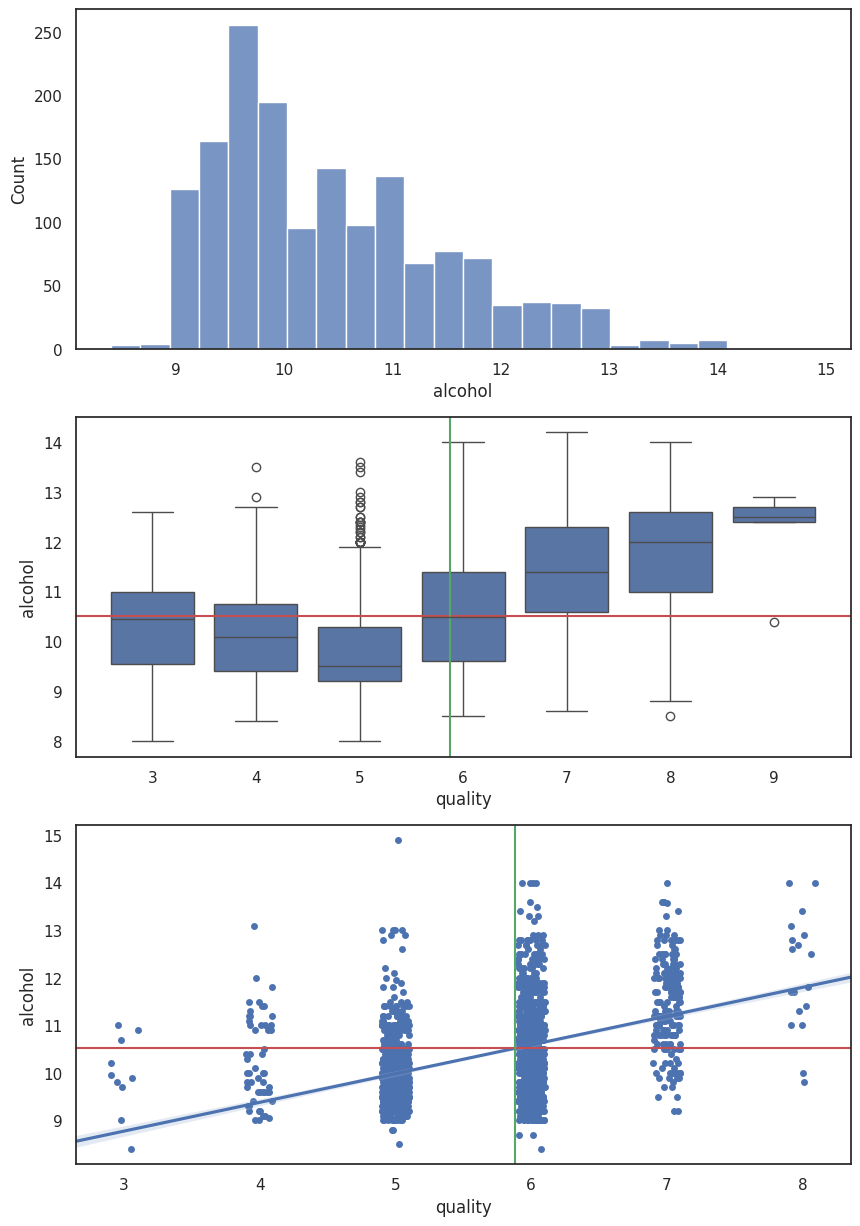

In [116]:
plot_corr_columns_whites("alcohol")

From the previous plots, we see that higher quality wines also have higher than average alcohol content. Can we confirm this trend?

## Density

count    4898.000000
mean        0.994027
std         0.002991
min         0.987110
25%         0.991723
50%         0.993740
75%         0.996100
max         1.038980
Name: density, dtype: float64

quality
3    0.994884
4    0.994277
5    0.995263
6    0.993961
7    0.992452
8    0.992236
9    0.991460
Name: density, dtype: float64

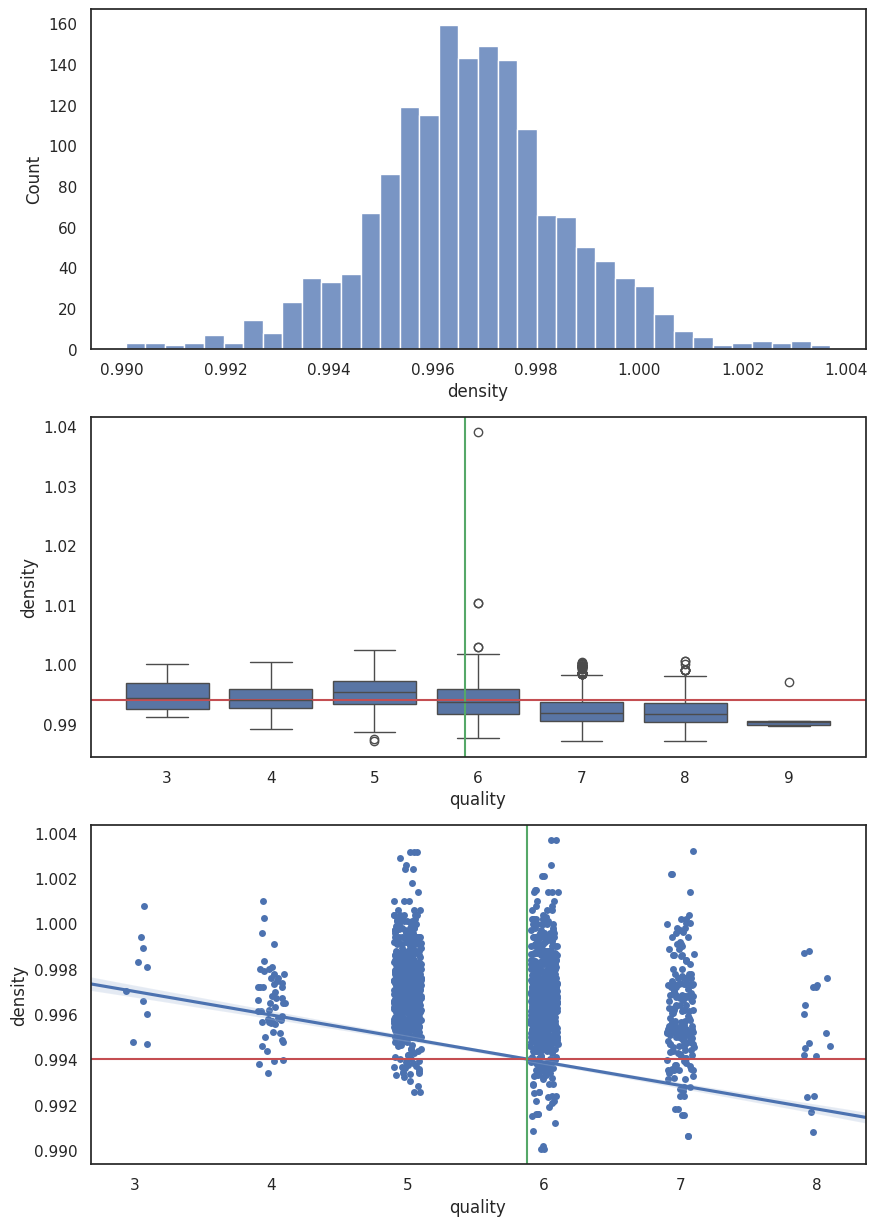

In [117]:
plot_corr_columns_whites("density")

We see from the previous plots that higher quality wines have lower density

## Chlorides

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

quality
3    0.054300
4    0.050098
5    0.051546
6    0.045217
7    0.038191
8    0.038314
9    0.027400
Name: chlorides, dtype: float64

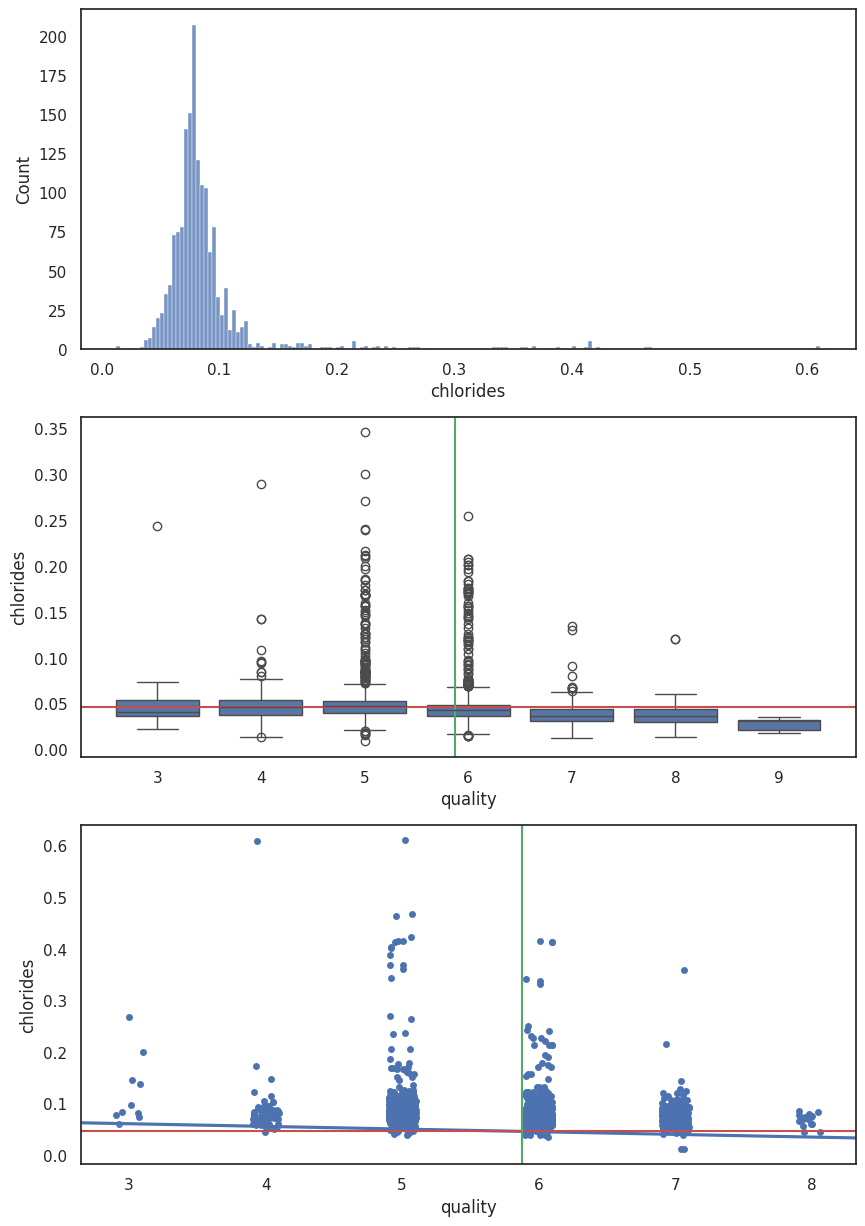

In [119]:
plot_corr_columns_whites("chlorides")

## Volatile acidity

count    4898.000000
mean        0.278241
std         0.100795
min         0.080000
25%         0.210000
50%         0.260000
75%         0.320000
max         1.100000
Name: volatile.acidity, dtype: float64

quality
3    0.333250
4    0.381227
5    0.302011
6    0.260564
7    0.262767
8    0.277400
9    0.298000
Name: volatile.acidity, dtype: float64

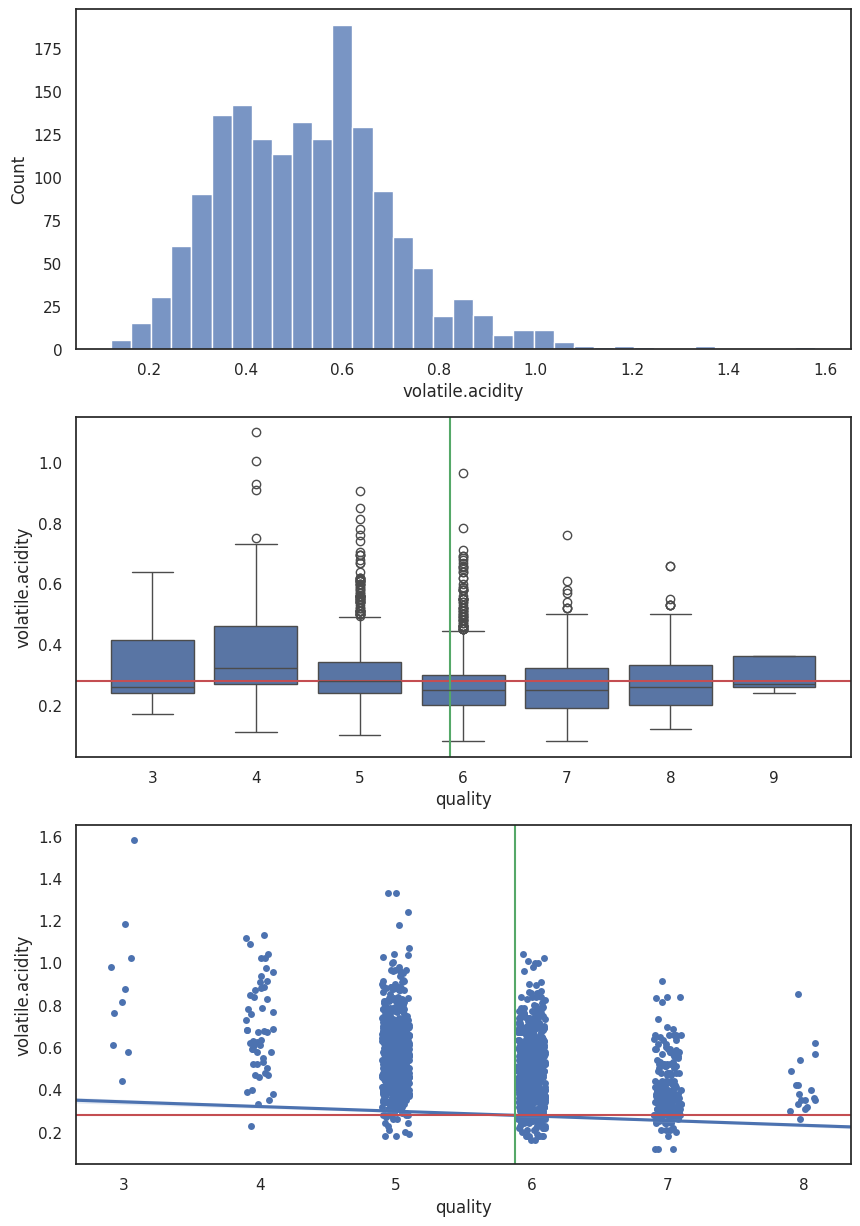

In [118]:
plot_corr_columns_whites("volatile.acidity")

Here we find the quality clearly decreases with volatile acidity. Can we push this analysis a bit further?

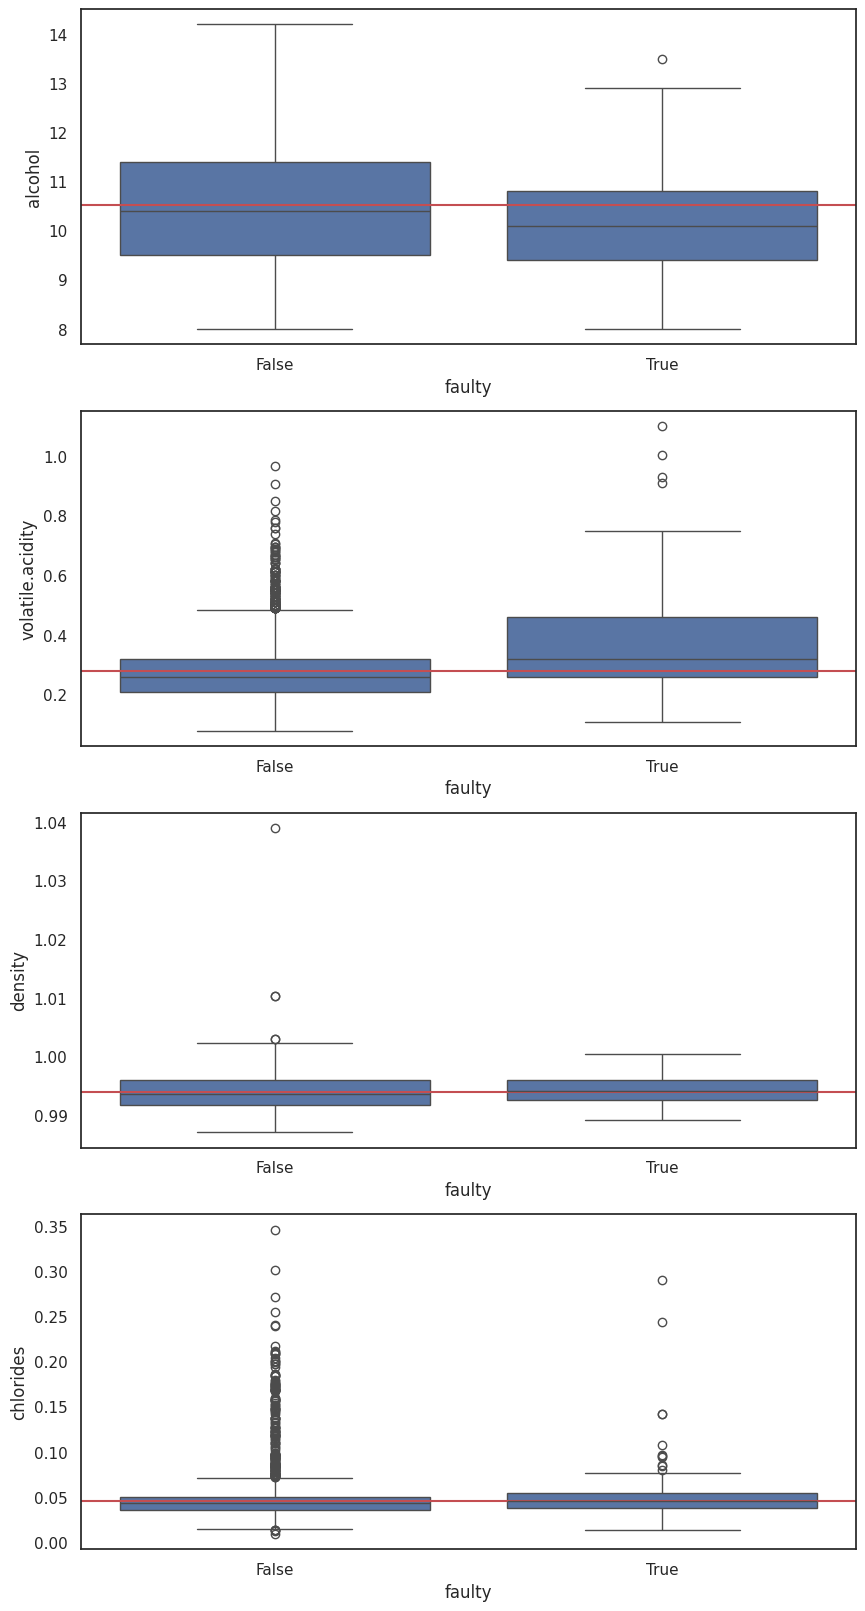

In [125]:
white_df["faulty"] = white_df["quality"] < 5  # Faulty wines
white_df.loc[white_df["faulty"]]["faulty"].count() / white_df["faulty"].count()

fig, axs = plt.subplots(4, figsize=(10, 20))
sns.boxplot(white_df, x="faulty", y="alcohol", ax=axs[0])
axs[0].axhline(white_df["alcohol"].mean(), color="r")
sns.boxplot(white_df, x="faulty", y="volatile.acidity", ax=axs[1])
axs[1].axhline(white_df["volatile.acidity"].mean(), color="r")
sns.boxplot(white_df, x="faulty", y="density", ax=axs[2])
axs[2].axhline(white_df["density"].mean(), color="r")
sns.boxplot(white_df, x="faulty", y="chlorides", ax=axs[3])
axs[3].axhline(white_df["chlorides"].mean(), color="r")

## Summary

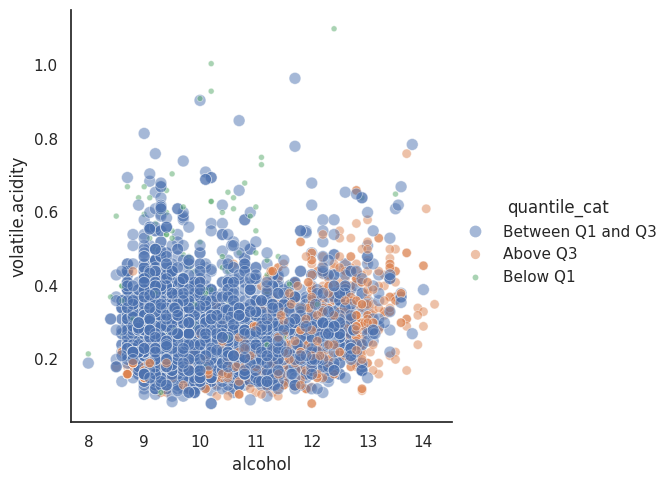

In [127]:
white_df["quantile_cat"] = "Between Q1 and Q3"
white_df.loc[
    white_df["quality"] < white_df["quality"].quantile(0.25), "quantile_cat"
] = "Below Q1"
white_df.loc[
    white_df["quality"] > white_df["quality"].quantile(0.75), "quantile_cat"
] = "Above Q3"
sns.relplot(
    white_df,
    x="alcohol",
    y="volatile.acidity",
    hue="quantile_cat",
    size="quantile_cat",
    alpha=0.5,
)

In [128]:
# Now let's define quadrants
white_df.loc[
    (white_df["volatile.acidity"] > white_df["volatile.acidity"].mean())
    & (white_df["alcohol"] > white_df["alcohol"].mean()),
    "quadrant",
] = "Upper-right"
white_df.loc[
    (white_df["volatile.acidity"] > white_df["volatile.acidity"].mean())
    & (white_df["alcohol"] <= white_df["alcohol"].mean()),
    "quadrant",
] = "Upper-left"
white_df.loc[
    (white_df["volatile.acidity"] <= white_df["volatile.acidity"].mean())
    & (white_df["alcohol"] > white_df["alcohol"].mean()),
    "quadrant",
] = "Lower-right"
white_df.loc[
    (white_df["volatile.acidity"] <= white_df["volatile.acidity"].mean())
    & (white_df["alcohol"] <= white_df["alcohol"].mean()),
    "quadrant",
] = "Lower-left"

In [129]:
white_groupby_quadrant_df = white_df.groupby("quadrant")
quadrant_count = white_groupby_quadrant_df["faulty"].count()
display(quadrant_count)
white_groupby_quadrant_faulty_df = white_df.loc[white_df["faulty"]].groupby("quadrant")
quadrant_faulty_count = white_groupby_quadrant_faulty_df["faulty"].count()
display(quadrant_faulty_count)

display(quadrant_faulty_count / quadrant_count)

quadrant
Lower-left     1567
Lower-right    1165
Upper-left     1168
Upper-right     998
Name: faulty, dtype: int64

quadrant
Lower-left     43
Lower-right    14
Upper-left     85
Upper-right    41
Name: faulty, dtype: int64

quadrant
Lower-left     0.027441
Lower-right    0.012017
Upper-left     0.072774
Upper-right    0.041082
Name: faulty, dtype: float64

So there is an order of magnitude less of faulty wines in the lower volatile acidity quadrants